# Rapport du TP2

Importation des dépendances liées aux TP:

In [1]:
from sklearn import datasets, model_selection
from sklearn.metrics import precision_score
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from time import time

- Charger le jeu de données MNIST

In [2]:
mnist = datasets.fetch_mldata('MNIST original')

D:\Anaconda3\envs\cert-big-data\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
D:\Anaconda3\envs\cert-big-data\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


- Diviser la base de données en 49000 lignes pour l’apprentissage (training) et le reste pour les tests

In [3]:
index = np.random.randint(70000, size=49000)
data = mnist.data[index]
target = mnist.target[index]

- Construire un modèle de classification ayant comme paramètre: `hidden_layer_sizes = (50)`, puis calculez la précession du classifieur 

In [4]:
# Construire modèle
MLP_model = MLPClassifier(hidden_layer_sizes=(50))

# Choisir données d'apprentissage et du test
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, target, train_size=0.8, test_size=0.2)

# Apprendre et mesurer précesion
MLP_model.fit(x_train, y_train)
y_predict = MLP_model.predict(x_test)

# Afficher score
print("Préscession = ", MLP_model.score(x_test, y_test))

Préscession =  0.9531632653061225


- Afficher la classe de l’image 4 et sa classe prédite

Valeur prédite :  [2.]
L'image: 


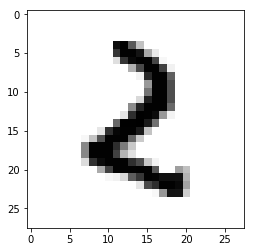

In [5]:
print("Valeur prédite : ", MLP_model.predict(x_test[4].reshape(1,-1)))
print("===========================================")
print("L'image: ")
plt.imshow(x_test.reshape((-1, 28, 28))[4],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()

- Calculez la précession en utilisant le package : `metrics.precision_score(ytest_pr, ypredTest_pr,average='micro')`

In [6]:
precision = precision_score(y_test, y_predict, average='micro')

# Afficher score
print("Precision = ", precision)

Precision =  0.9531632653061225


- Varier le nombre de la couches de 1 entre (2 et 100) couches, et recalculer la précision du classifieur. 

In [45]:
max_l = 10
min_l = 1
precisions = np.zeros(max_l - min_l)
hidden_layer = (50,)* (max_l-min_l)

for n_layer in range (max_l - min_l):
    
    # split donnée
    x_train, x_test, y_train, y_test = model_selection.train_test_split(data, target, train_size=0.8, test_size=0.2)
    
    # Init modèle
    hidden_layer += (50,)
    MLP_model = MLPClassifier(hidden_layer_sizes = hidden_layer[0:n_layer])
    MLP_model.fit(x_train, y_train)
    y_predict = MLP_model.predict(x_test)
    
    precisions[n_layer] = precision_score(y_test, y_predict, average='micro')

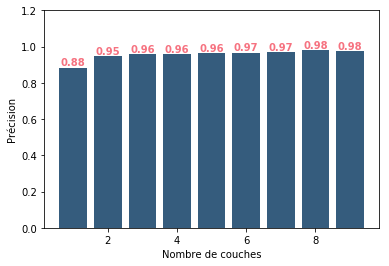

In [46]:
plt.bar(range(min_l, max_l), precisions, color='#355C7D')
plt.ylim(0,1.2)
for i in range(max_l - min_l):
    plt.text(i+1, precisions[i], "%.2f" % precisions[i], fontweight='bold', color='#F67280', ha='center', va='bottom')
    
plt.xlabel("Nombre de couches")
plt.ylabel("Précision")
plt.show()

- Construire cinq modèles de classification des données mnist, avec des réseaux qui ont respectivement de 1 à 10 couches cachées, et des tailles de 
couches entre 10 et 300 au choix d’une façon aléatoire. Quelles sont les performances en taux de bonne classification et en temps d’apprentissage 
obtenus pour chaque modèle ? Utilisez la fonction `time()` du package time pour mesurer le temps d’apprentissage d’un modèle.   

In [32]:
# nb_hidden_layer == nombre de couche pour le modèle courant
temps_exec = np.zeros(5)
precisions = np.zeros(5)
for model in range(5):
    
    nb_hidden_layer = model * 2
    t_before = time()
    
    # Générer la taille de couche aléatoirement
    hidden_layer = np.random.randint(10, 300, size = nb_hidden_layer) 
    
    # Transformer en tuple
    hidden_layer = tuple(hidden_layer.reshape(1, -1)[0])          

    # Apprentissage
    MLP_model = MLPClassifier(hidden_layer_sizes = hidden_layer)
    x_train, x_test, y_train, y_test = model_selection.train_test_split(data, target, train_size=0.8, test_size=0.2)
    MLP_model.fit(x_train, y_train)
    
    # Calcul le temps d'exec
    t_after = time()
    temps_exec[model] = t_after - t_before
        
    # Calcul précision
    y_predict = MLP_model.predict(x_test)
    precisions[model] = precision_score(y_test, y_predict, average='micro')

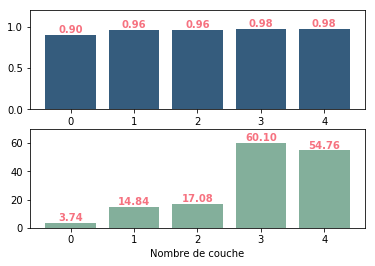

In [41]:
plt.subplot(2, 1, 1)
plt.bar(range(5), precisions, color='#355C7D')
plt.ylim(0,1.2)
for i in range(5):
    plt.text(i, precisions[i], "%.2f"%precisions[i], fontweight='bold', color='#F67280', ha='center', va='bottom')

plt.subplot(2, 1, 2)
plt.bar(range(5), temps_exec, color='#83AF9B')
plt.ylim(0, 70)
for i in range(5):
    plt.text(i, temps_exec[i], "%.2f"%temps_exec[i], fontweight='bold', color='#F67280', ha='center', va='bottom')

plt.xlabel("Nombre de couche")
plt.show() 

- Etudier la convergence des algorithmes d’optimisation disponibles : **L-BFGS**, **SGD** et **Adam**. 

In [32]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, target, train_size=0.8, test_size=0.2)
solvers = ['lbfgs', 'sgd', 'adam']
temps_execs = np.zeros(3)
precisions = np.zeros(3)

for i in range(3):
    
    t_before = time()
    
    MLP_model = MLPClassifier(hidden_layer_sizes = (50,50,50) ,solver = solvers[i])
    MLP_model.fit(x_train, y_train)
    
    t_after = time()
    temps_execs[i] = t_after - t_before
    y_predict = MLP_model.predict(x_test)
    precisions[i] = precision_score(y_test, y_predict, average='micro')
    
    print(solvers[i], '\t|', temps_execs[i], '\t|', precisions[i])
    
print("Meilleur solver : ", solvers[ np.argmin(temps_execs) ])

lbfgs 	| 53.25824546813965 	| 0.9241836734693878
sgd 	| 33.434988498687744 	| 0.946734693877551
adam 	| 9.330799579620361 	| 0.9611224489795919
Meilleur solver :  adam


- Varier les fonctions d’activation **{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}**

In [63]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, target, train_size=0.8, test_size=0.2)
activations = ['identity', 'logistic', 'tanh', 'relu']
temps_execs = np.zeros(3)
precisions = np.zeros(3)

for i in range(3):
    t_before = time()
    
    MLP_model = MLPClassifier(hidden_layer_sizes = (50,50,50), solver='adam', activation = activations[i])
    MLP_model.fit(x_train, y_train)
    
    t_after = time()
    temps_execs[i] = t_after - t_before
    y_predict = MLP_model.predict(x_test)
    precisions[i] = precision_score(y_test, y_predict, average='micro')
    
    print(activations[i], '\t|', temps_execs[i], '\t|', precisions[i])

print("Meilleur activateur : ", activations[ np.argmin(temps_execs) ])

identity 	| 21.195919513702393 	| 0.9031632653061225
logistic 	| 26.84736680984497 	| 0.9210204081632654
tanh 	| 17.061084747314453 	| 0.9166326530612245
Meilleur activateur :  tanh


- Changer la valeur de la régularisation L2 (paramètre α)

In [66]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, target, train_size=0.8, test_size=0.2)
alphas = np.logspace(-10, 15, 30)
temps_execs = np.zeros(alphas.size)
precisions = np.zeros(alphas.size)
print("alpha \t| temps exec \t\t| precision")

for i in range(alphas.size):
    t_before = time()
    
    MLP_model = MLPClassifier(hidden_layer_sizes = (50,50,50), solver = 'adam', activation = 'identity', alpha = alphas[i])
    MLP_model.fit(x_train, y_train)
    
    t_after = time()
    temps_execs[i] = t_after - t_before
    y_predict = MLP_model.predict(x_test)
    precisions[i] = precision_score(y_test, y_predict, average='micro')
    
    print(alphas[i], '\t|', temps_execs[i], '\t|', precisions[i])

print("Meilleur alpha : ", alphas[ np.argmin(temps_execs) ])

alpha 	| temps exec 		| precision
1e-10 	| 27.52830719947815 	| 0.9079591836734694
7.278953843983161e-10 	| 23.7465341091156 	| 0.9102040816326531
5.298316906283702e-09 	| 15.362519264221191 	| 0.8953061224489796
3.8566204211634724e-08 	| 20.62122869491577 	| 0.8931632653061224
2.807216203941176e-07 	| 20.632662296295166 	| 0.898469387755102
2.0433597178569395e-06 	| 16.432379007339478 	| 0.8960204081632653
1.4873521072935119e-05 	| 22.62927269935608 	| 0.8914285714285715
0.00010826367338740541 	| 31.239237070083618 	| 0.9057142857142857
0.0007880462815669905 	| 32.83896088600159 	| 0.9059183673469388
0.00573615251044867 	| 25.65678119659424 	| 0.9053061224489796
0.04175318936560392 	| 26.92153525352478 	| 0.9070408163265307
0.3039195382313195 	| 41.135924339294434 	| 0.905
2.21221629107045 	| 68.32055711746216 	| 0.9159183673469388
16.10262027560936 	| 62.98365044593811 	| 0.9036734693877551
117.21022975334793 	| 22.750966548919678 	| 0.8615306122448979
853.1678524172779 	| 12.6786315

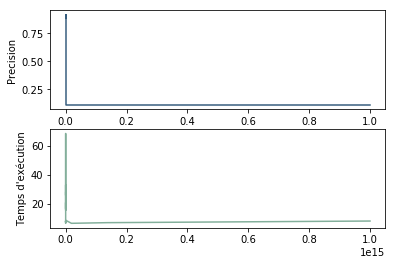

In [67]:
plt.subplot(2, 1, 1)
plt.plot(alphas, precisions, color='#355C7D')
plt.ylabel("Precision")

plt.subplot(2, 1, 2)
plt.plot(alphas, temps_execs, color='#83AF9B')
plt.ylabel("Temps d'exécution")

plt.show() 

- Choisissez le modèle qui propose de meilleurs résultats

- Sur chacun des cas précédents, tracez les différentes courbes d'erreurs.

- A votre avis, quels sont les avantages et les inconvénients des A-nn : optimalité ? temps de calcul ? passage à l'échelle ? 

**Ans**: 
- **ANN** permets d'avoir une mieux précision par rapport à d'autre méthode. Cependant c'est coûteux en temps et en ressource pour l'apprentissage.
- Le passage à l'échelle de **ANN** est possible, cette méthode permets effectivement l'apprentissage en batch. Elle permets également à s'adapter au changement de comportement du sujet observé.